In [3]:
import pandas as pd 
import numpy as np 
import json
pd.set_option('display.max_columns', None)
# import custom packages for EDA
from EDA import FeatureSignificance, FeatureVisualisation 

# import data
df_base = pd.read_csv('data/Base.csv') 

# import feature data types
with open('data_types.json') as f:
    data_types = json.load(f) 

# encoding source {'INTERNET', 'TELEAPP'} into source_is_internet_not_teleapp
df_base['source_is_internet_not_teleapp'] = (df_base['source'] == 'INTERNET').astype(int)
df_base.drop('source', axis=1, inplace=True)

In [84]:
import EDA
import importlib
importlib.reload(EDA)
FeatureSignificance = EDA.FeatureSignificance
FeatureVisualisation = EDA.FeatureVisualisation
fs = FeatureSignificance(df_base, target='fraud_bool')
fv = FeatureVisualisation(df_base, target='fraud_bool')

In [68]:
fv.visualisations()

temporal                                    [Line plots, Heatmaps]
ordinal                                    [Bar plots, Line plots]
numerical_discrete                          [Boxplots, Histograms]
numerical_continuous_bounded             [Density plots, Boxplots]
numerical_continuous_unbounded          [Scatterplots, Histograms]
nominal_multi_category            [Bar charts, Stacked bar charts]
nominal_binary                                        [Bar charts]
dtype: object


In [69]:
fs.calculations()

temporal                        [Spearman Correlation, Chi-Square Test (Goodness of Fit)]
ordinal                           [Spearman Correlation, Logistic Regression Coefficient]
numerical_discrete                                   [Point-Biserial Correlation, T-Test]
numerical_continuous                             [Spearman Correlation, T-Test, K-S Test]
nominal_multi_category        [Chi-Square Test of Independence (Contingency), Cramér’s V]
nominal_binary            [Chi-Square Test of Independence (Contingency), Point-Biserial]
dtype: object


In [6]:
fs.numerical_discrete(data_types['numerical_discrete'])

/opt/miniconda3/envs/pytf/lib/python3.11/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


,Point-Biserial Correlation,p-value,t_stat,t_stat p_value
Feature,,,,
credit_risk_score,0.070588,0.000000e+00,-60.091371,0.000000e+00
proposed_credit_limit,0.068907,0.000000e+00,-52.350791,0.000000e+00
device_distinct_emails_8w,0.036542,1.921787e-292,-20.377266,1.199204e-90
current_address_months_count,0.033480,7.586132e-245,-34.620596,1.082672e-249
bank_months_count,0.020929,4.312880e-73,-17.692433,1.458684e-68
prev_address_months_count,0.020083,5.238191e-27,-8.357725,2.417317e-16
zip_count_4w,0.005212,1.868284e-07,-5.210355,1.918071e-07
bank_branch_count_8w,-0.011577,5.397590e-31,12.764196,4.674261e-37
date_of_birth_distinct_emails_4w,-0.043224,0.000000e+00,44.852802,0.000000e+00


In [7]:
fs.numerical_continuous(data_types['numerical_continuous_bounded'] + data_types['numerical_continuous_unbounded'])

,Spearman Correlation,Spearman p-value,T-Statistic,T-Test p-value,K-S Statistic,K-S p-value
Feature,,,,,,
session_length_in_minutes,0.002058,3.981677e-02,-7.450250,1.000315e-13,0.027061,2.318452e-07
velocity_24h,-0.010509,7.791899e-26,11.511446,1.709035e-30,0.047764,4.602355e-22
velocity_4w,-0.013524,1.118804e-41,10.882405,1.915534e-27,0.071602,4.519496e-49
days_since_request,-0.014209,7.956264e-46,-0.535197,5.925240e-01,0.069237,6.583571e-46
velocity_6h,-0.016497,3.816254e-61,17.508297,9.682576e-68,0.063211,2.493909e-38
intended_balcon_amount,-0.017954,4.326131e-72,29.776915,1.070649e-187,0.143678,6.122341e-197
name_email_similarity,-0.037283,1.936639e-304,35.923329,1.167023e-267,0.185558,0.000000e+00


In [8]:
fs.nominal_multi_category(data_types['nominal_multi_category'])

,Chi Square Statistic,p-value (Chi-Square),cramers v
Feature,,,
housing_status,13202.787719,0.0,0.114903
device_os,6478.945928,0.0,0.080492
employment_status,1572.499001,0.0,0.039655
payment_type,1528.342010,0.0,0.039094


In [9]:
fs.nominal_binary(data_types['nominal_binary'])

,Chi Square Statistic,p-value (Chi-Square),Point-Biserial Correlation,p-value (Point-Biserial)
Feature,,,,
email_is_free,769.952405,1.841219e-169,0.027758,1.216719e-169
foreign_request,284.060841,9.787932e-64,0.016885,5.722730e-64
source_is_internet_not_teleapp,14.937804,1.111140e-04,-0.003922,8.774983e-05
phone_mobile_valid,173.301368,1.406547e-39,-0.013180,1.140352e-39
phone_home_valid,1233.281326,3.567963e-270,-0.035128,1.734899e-270
has_other_cards,1235.161652,1.392459e-270,-0.035156,6.347503e-271
keep_alive_session,2528.754445,0.000000e+00,-0.050296,0.000000e+00


In [10]:
fs.ordinal(data_types['ordinal'])

,Spearman Correlation,Spearman p-value,Log Regression coef
Feature,,,
income,0.049583,0.0,1.711414
customer_age,0.058146,0.0,0.045050


In [11]:
fs.temporal(data_types['temporal'])

,Spearman Correlation,p-value (Spearman),Chi-Square Statistic,p-value (Chi-Square)
Feature,,,,
month,0.012949,2.362542e-38,330.160493,2.166747e-67



### next steps
#### significance testing
    - feature sub categories
    - are missing values indicative of target variable?


#### visualisations
    - is there an order? A to G for the following variables, can they be treated as ordinal:
        - housing_status
        - employment_status

#### Automated Feature Selection
    - After testing significance, use methods like Recursive Feature Elimination (RFE) or SHAP values for machine learning-based importance ranking.



In [12]:
fv.calculations()

temporal                                    [Line plots, Heatmaps]
ordinal                                    [Bar plots, Line plots]
numerical_discrete                          [Boxplots, Histograms]
numerical_continuous_bounded             [Density plots, Boxplots]
numerical_continuous_unbounded          [Scatterplots, Histograms]
nominal_multi_category            [Bar charts, Stacked bar charts]
nominal_binary                                        [Bar charts]
dtype: object


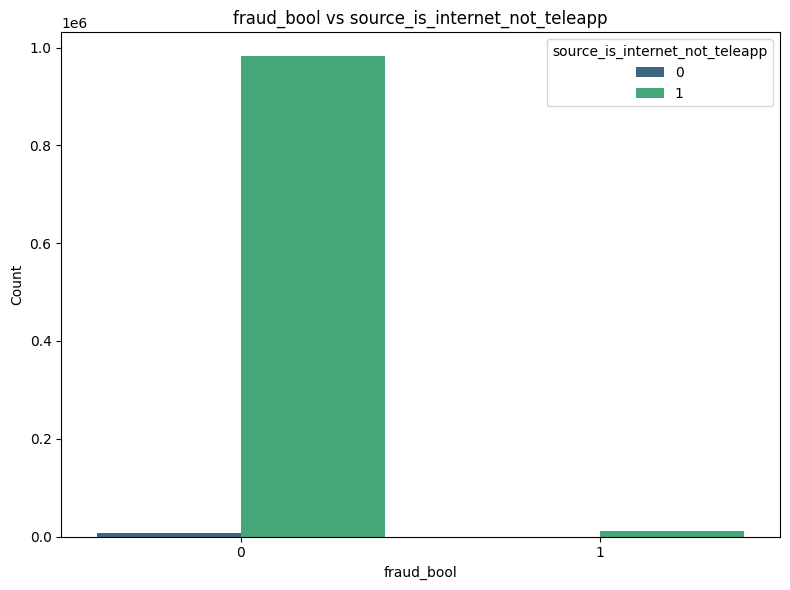

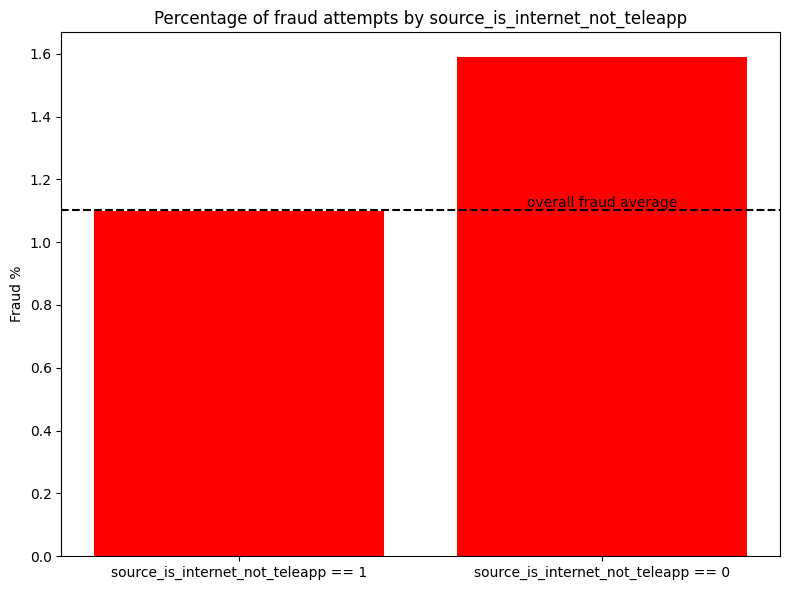

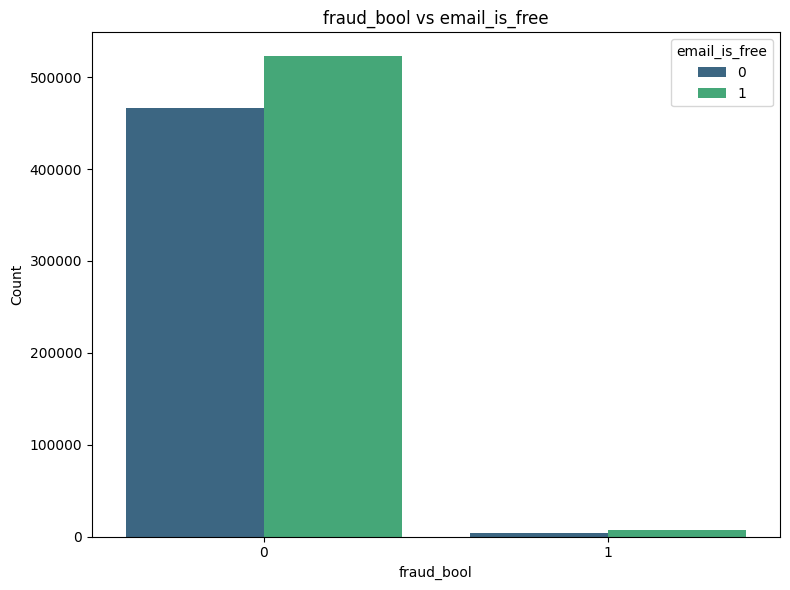

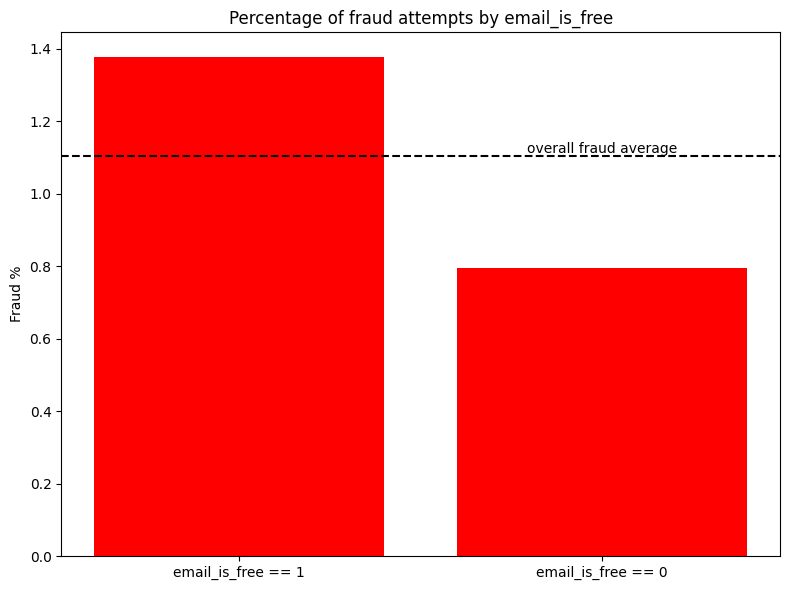

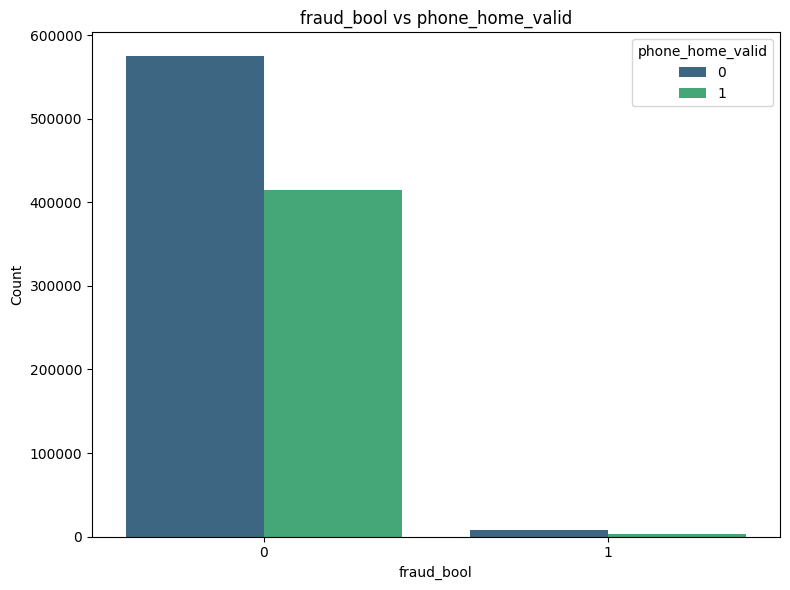

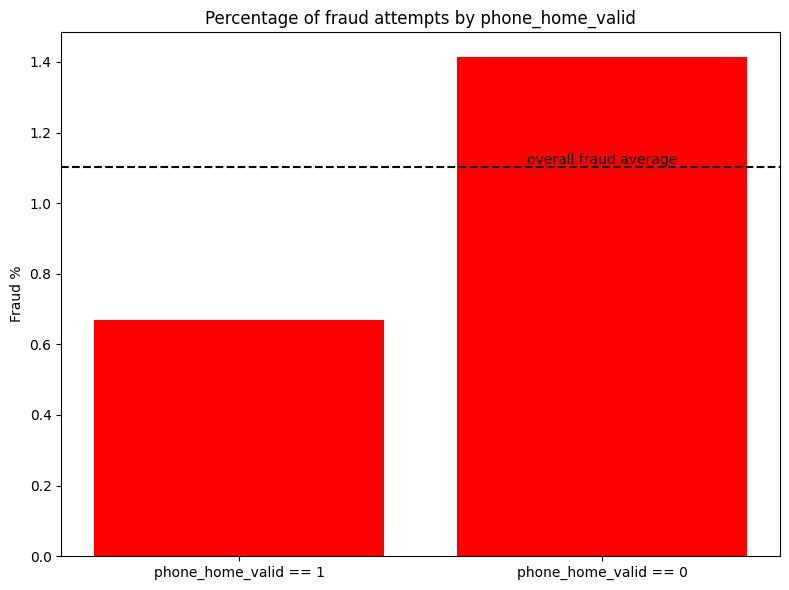

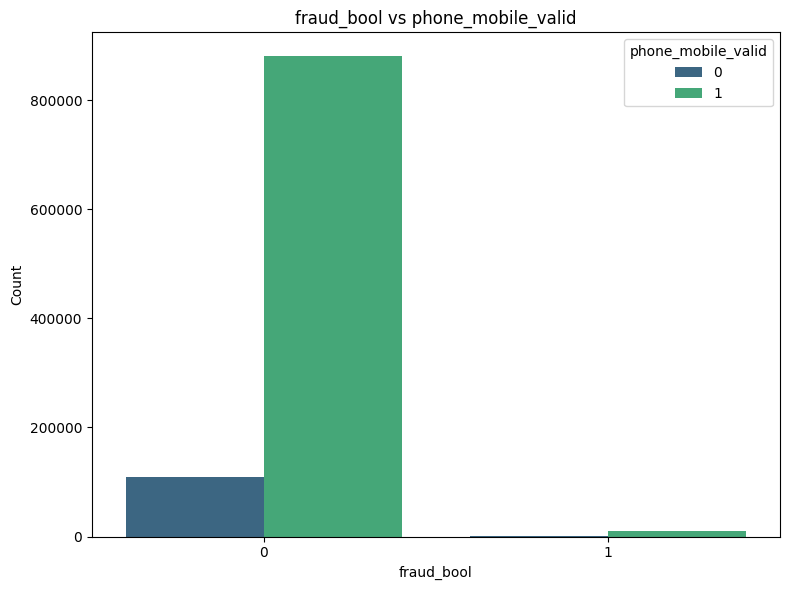

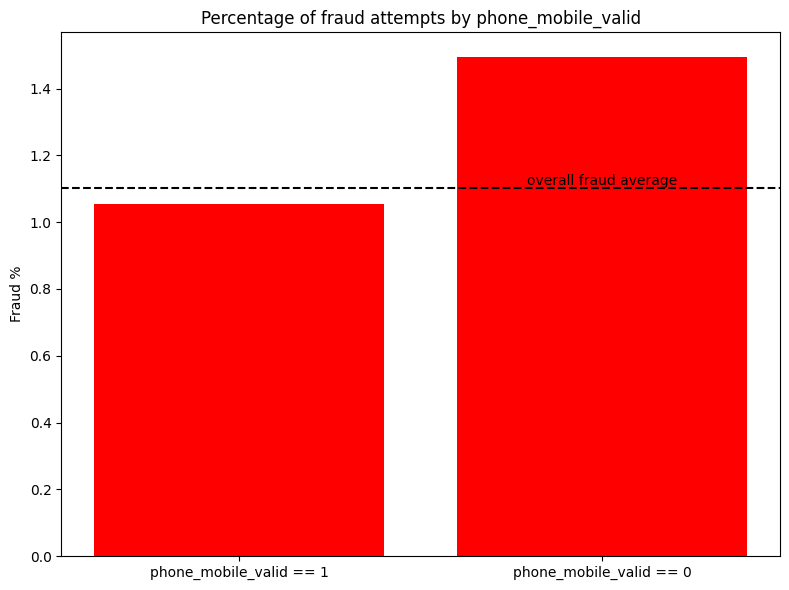

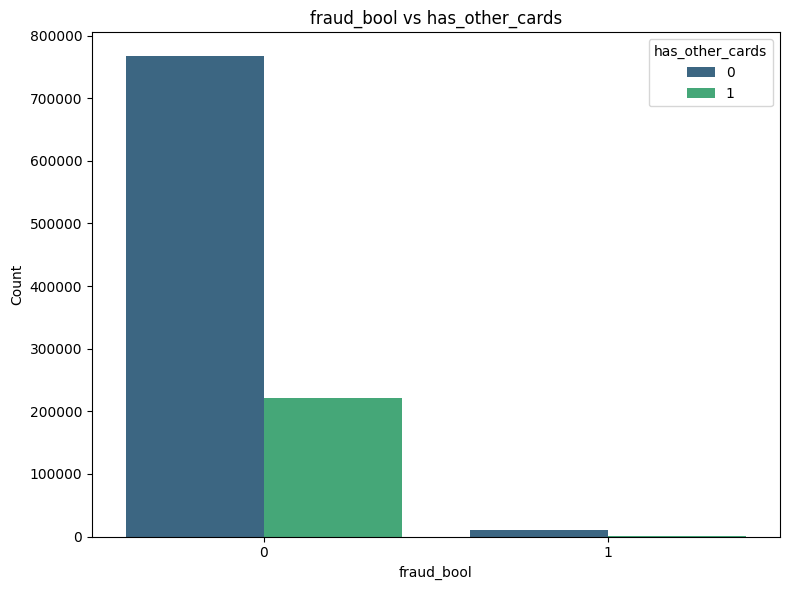

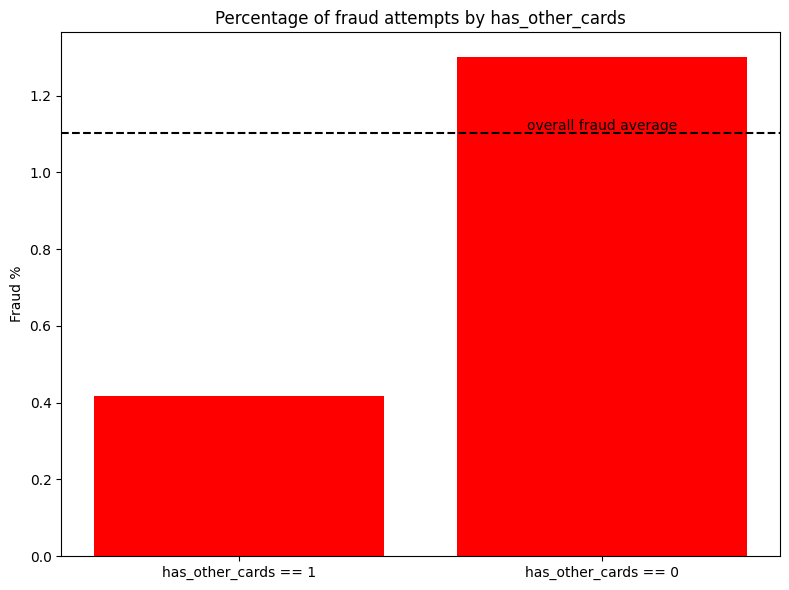

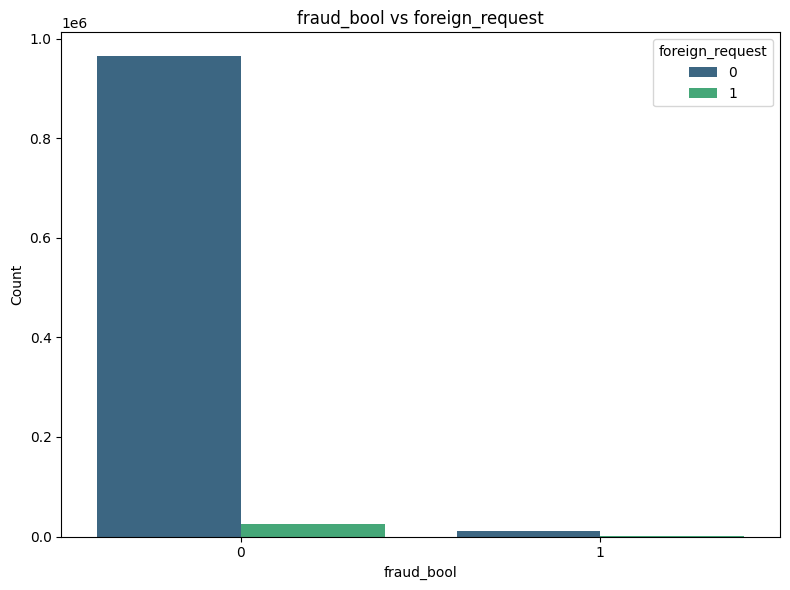

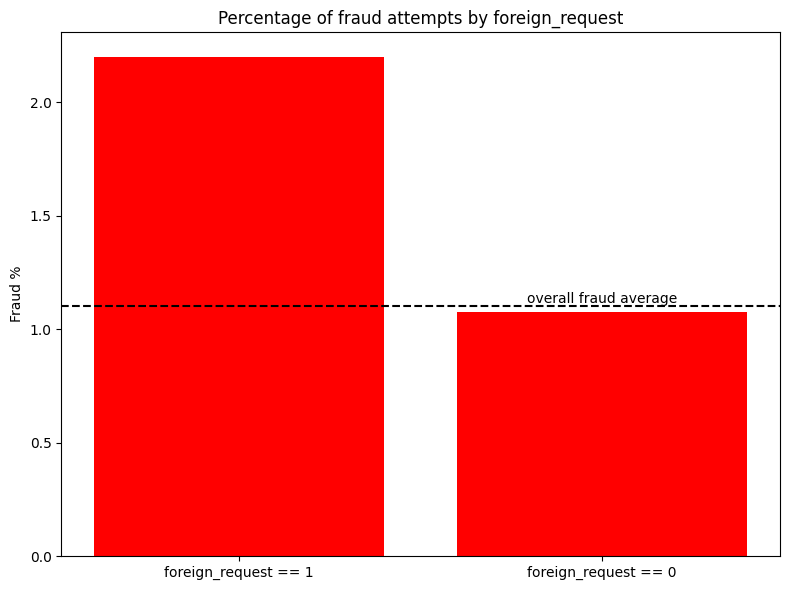

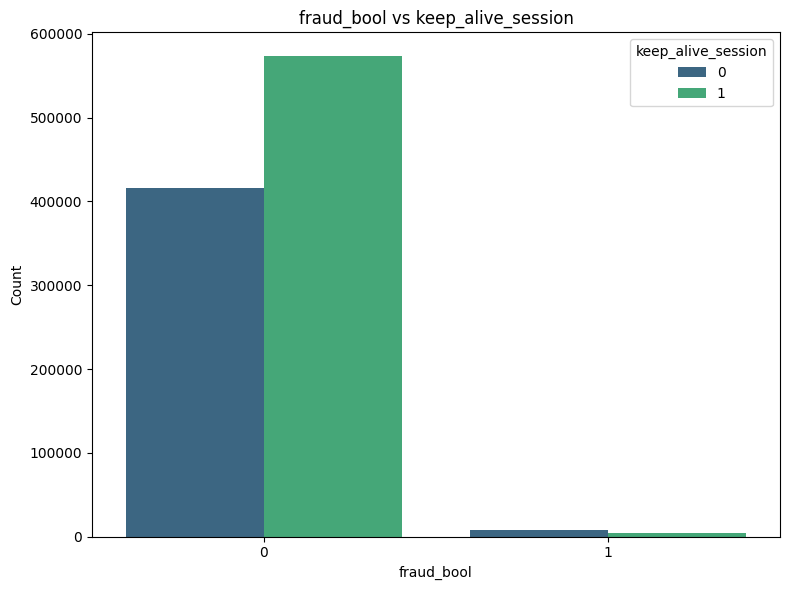

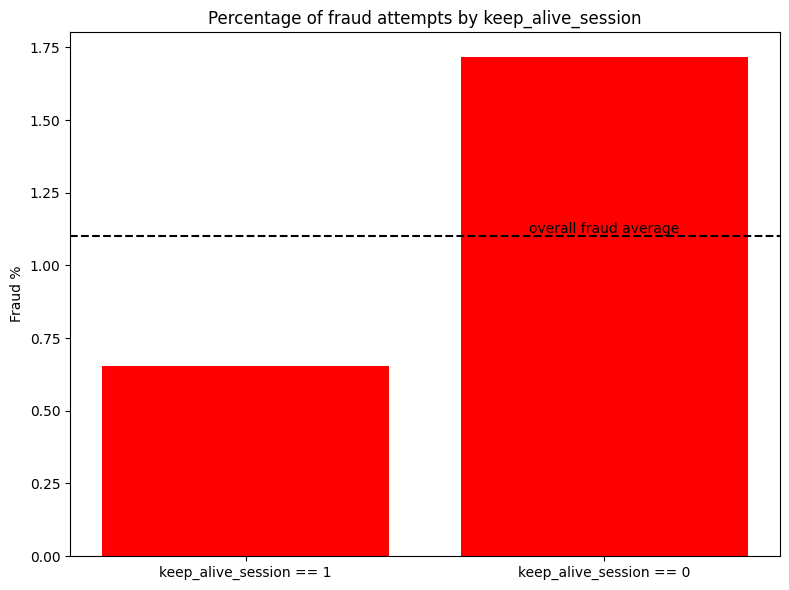

In [13]:
fv.nominal_binary(data_types['nominal_binary'])

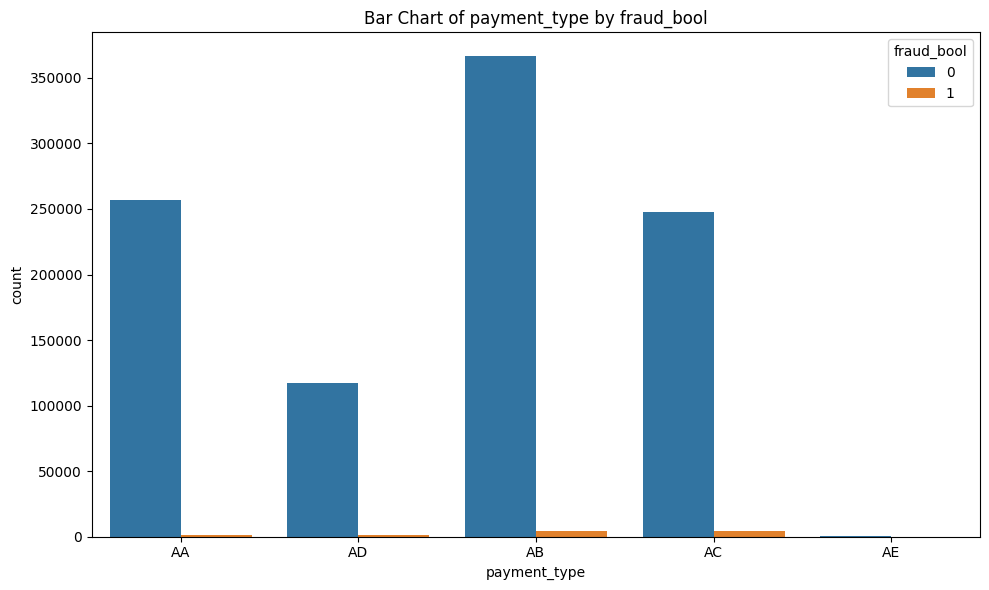

<Figure size 1000x600 with 0 Axes>

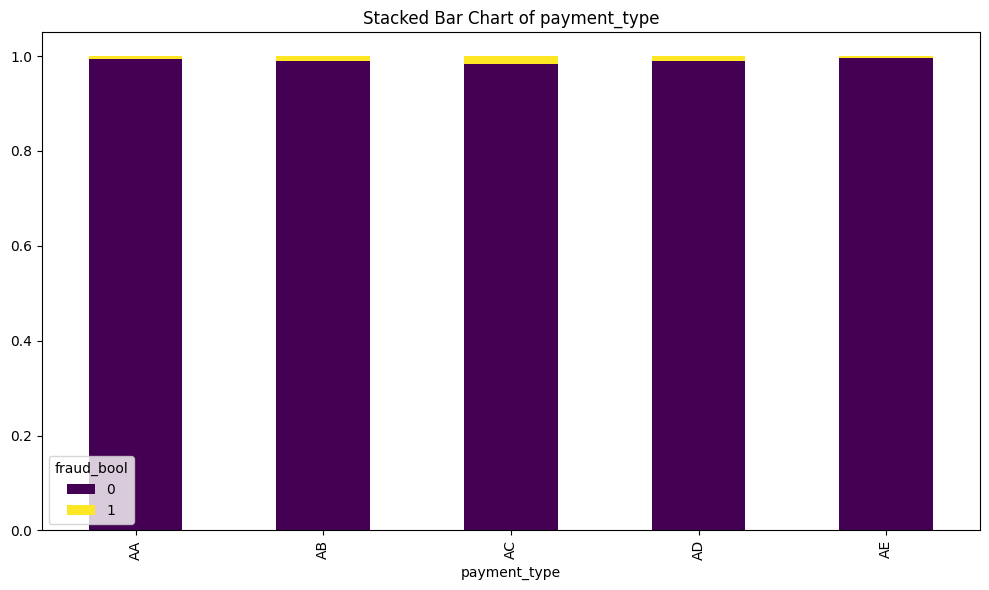

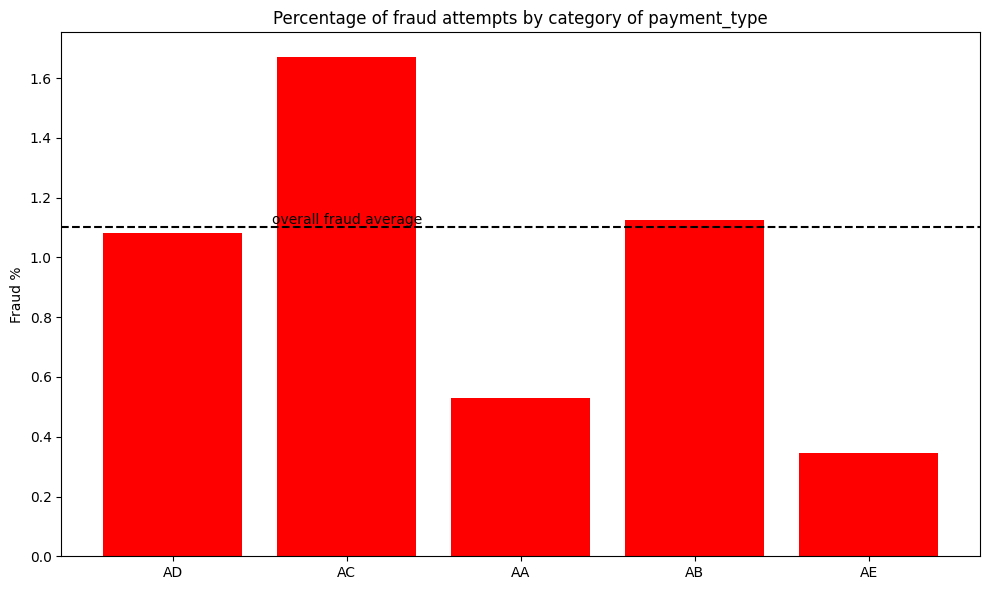

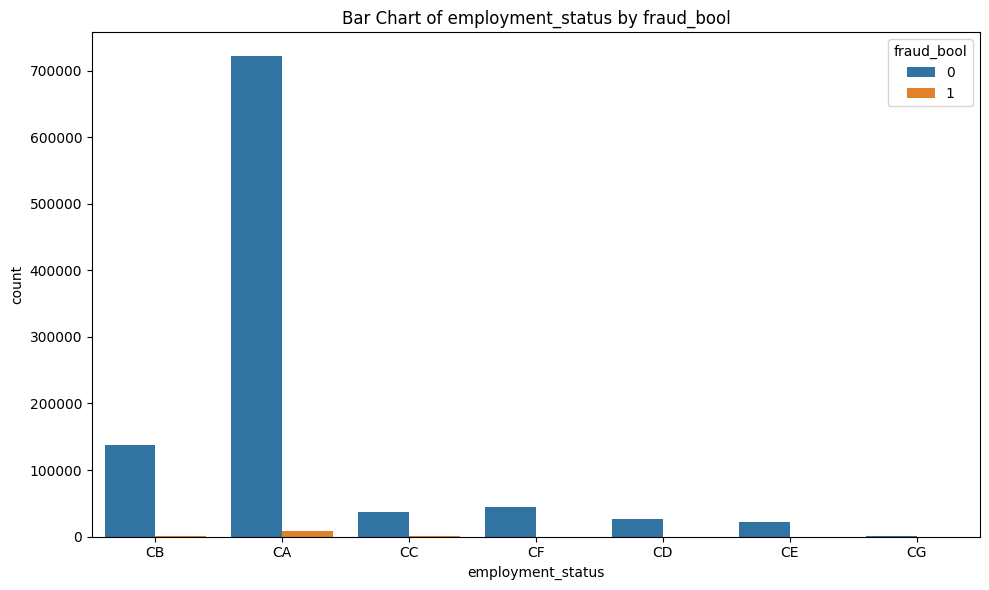

<Figure size 1000x600 with 0 Axes>

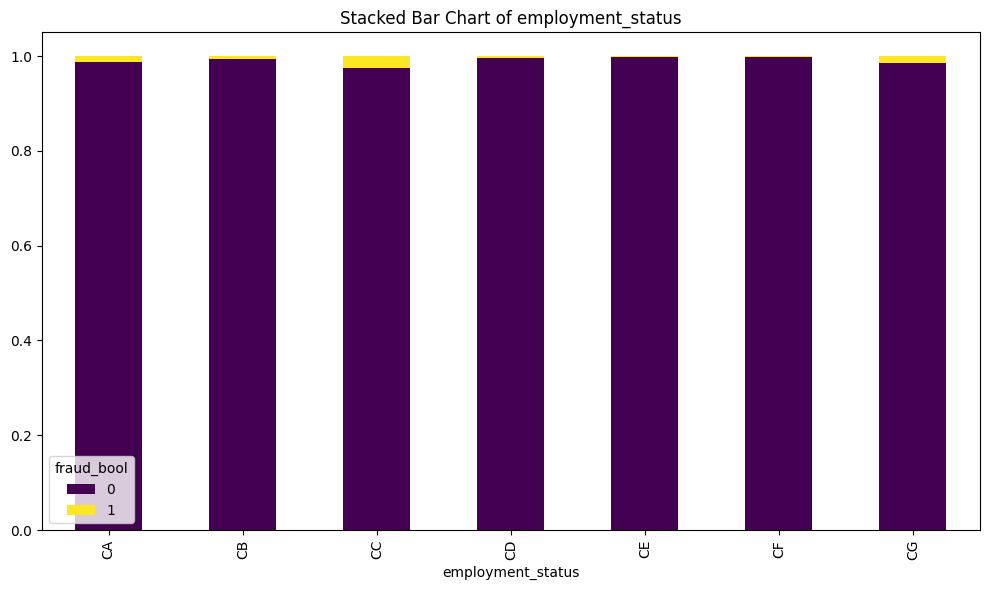

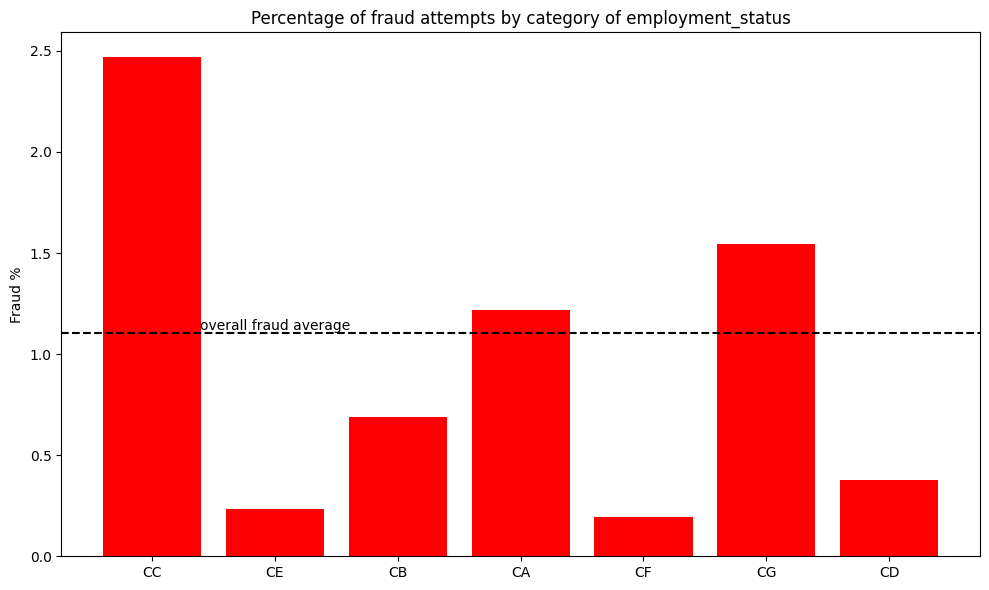

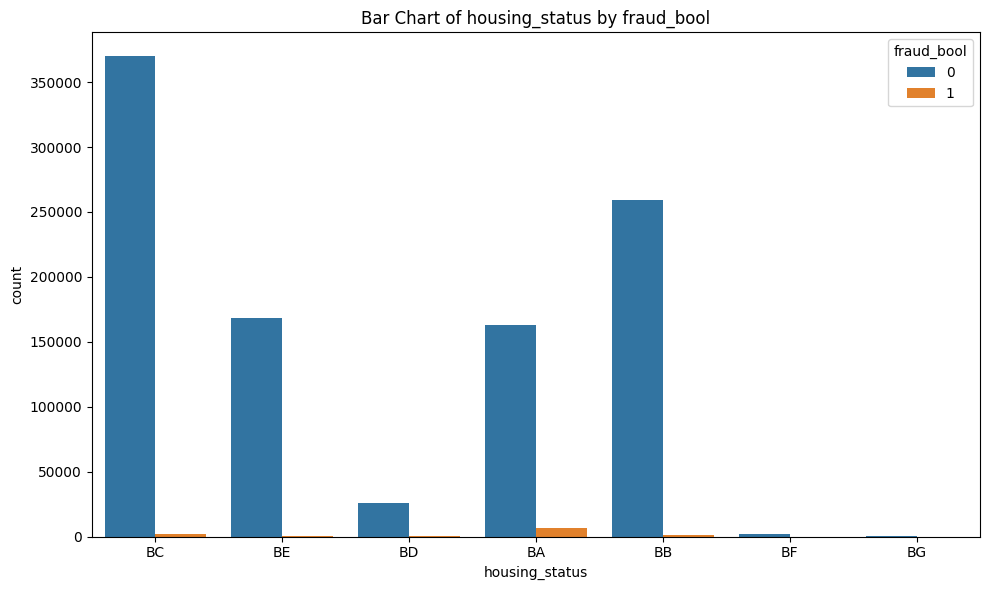

<Figure size 1000x600 with 0 Axes>

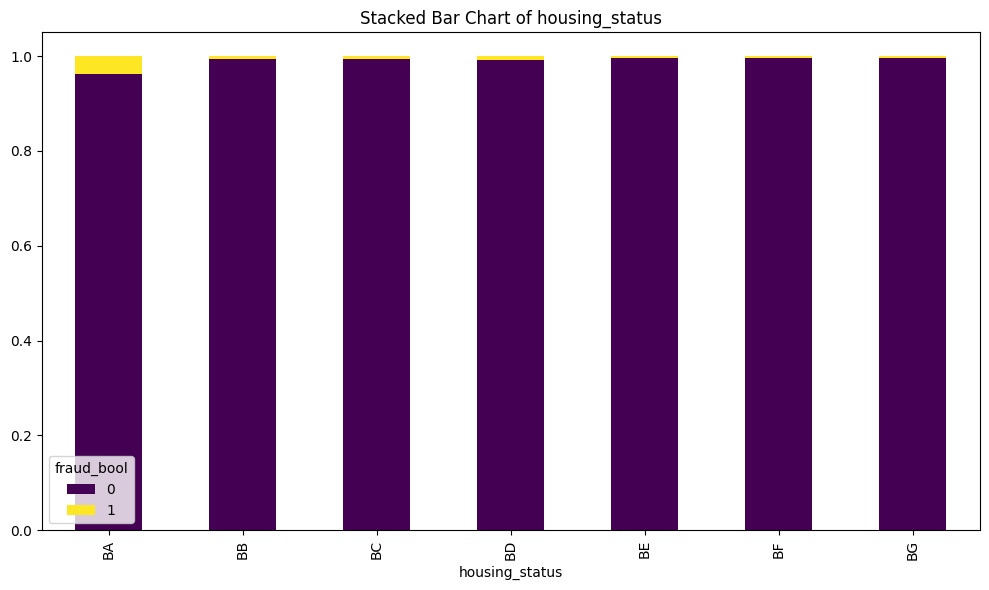

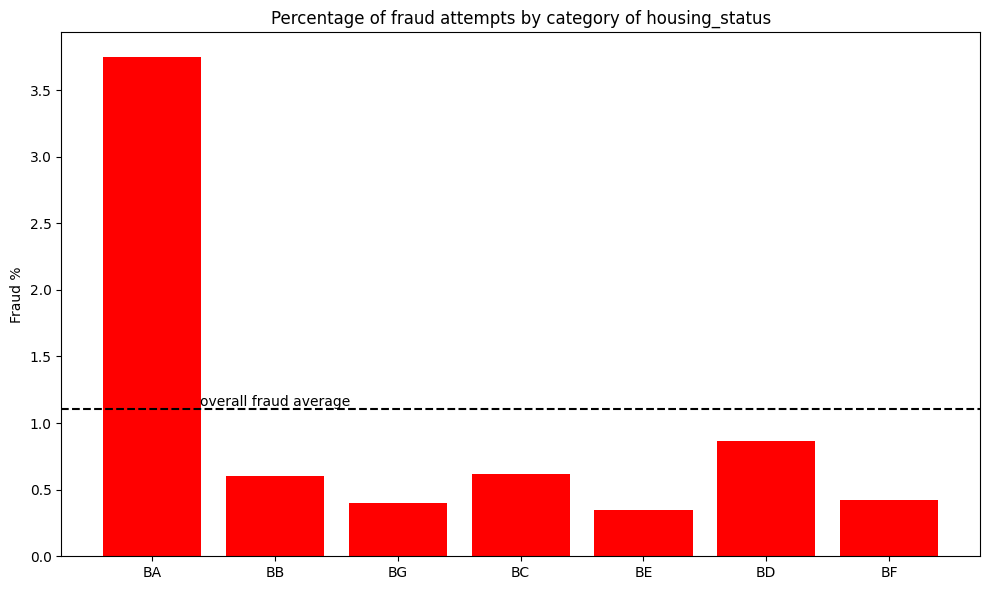

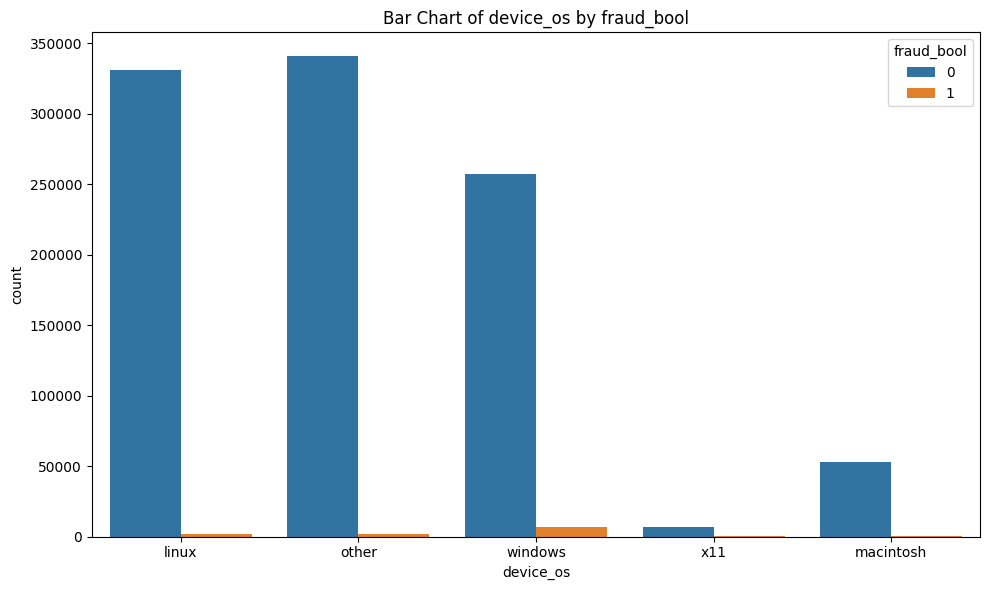

<Figure size 1000x600 with 0 Axes>

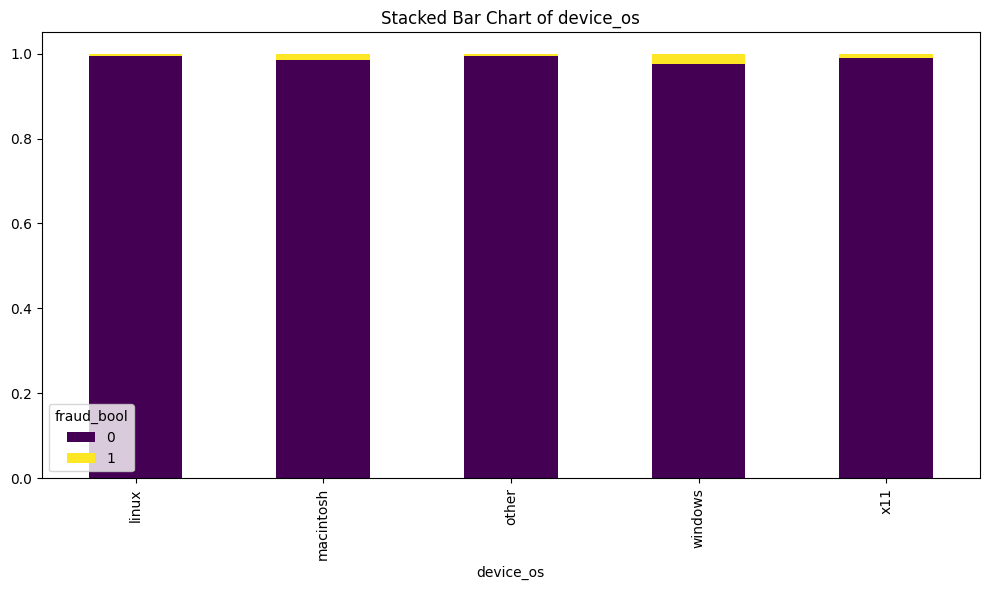

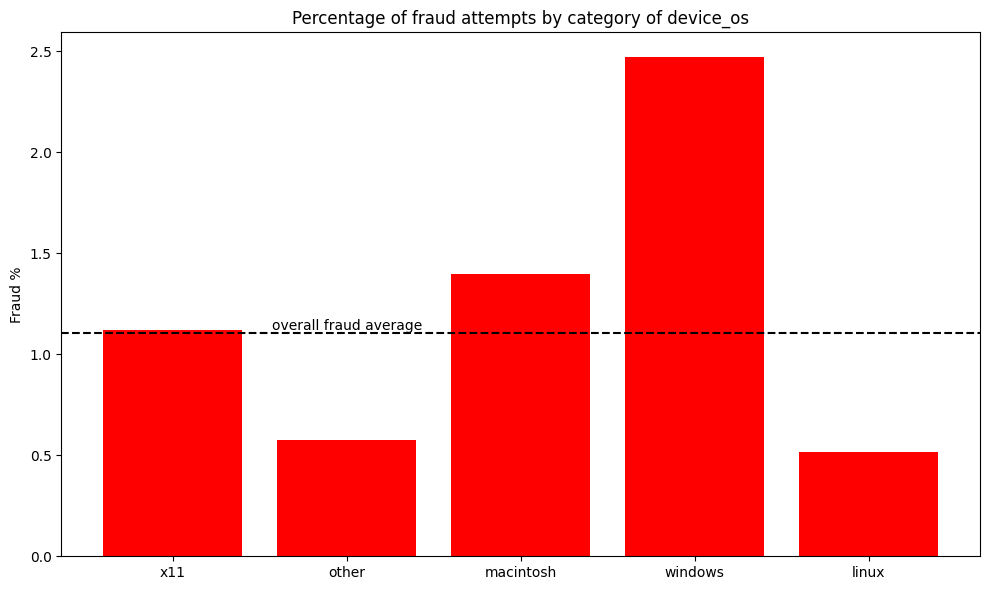

In [14]:
fv.nominal_multi_category(data_types['nominal_multi_category'])

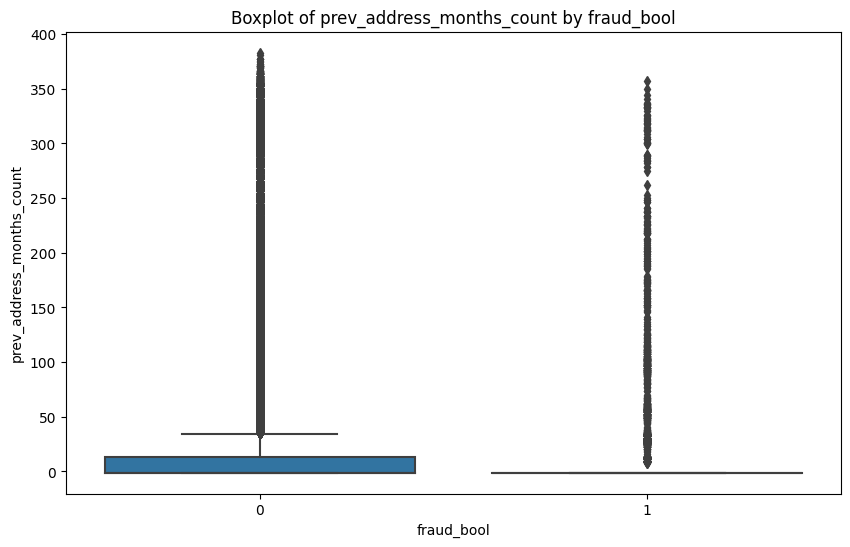

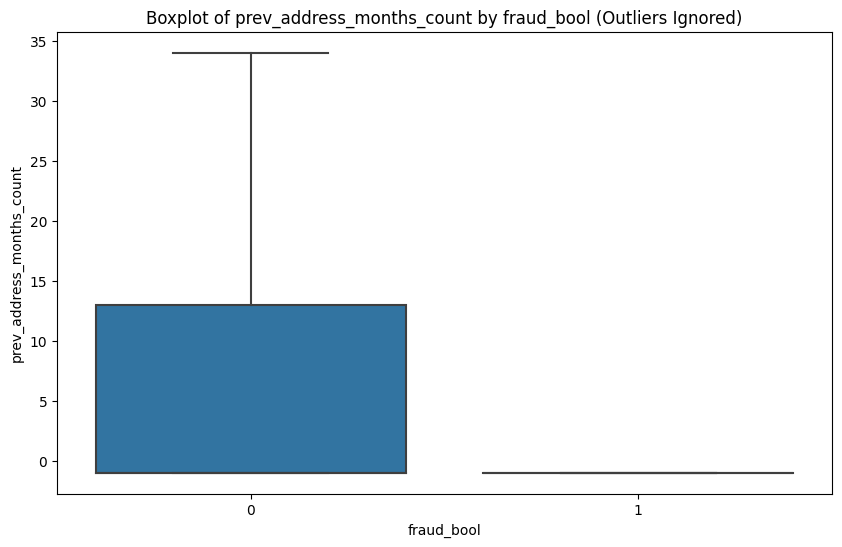

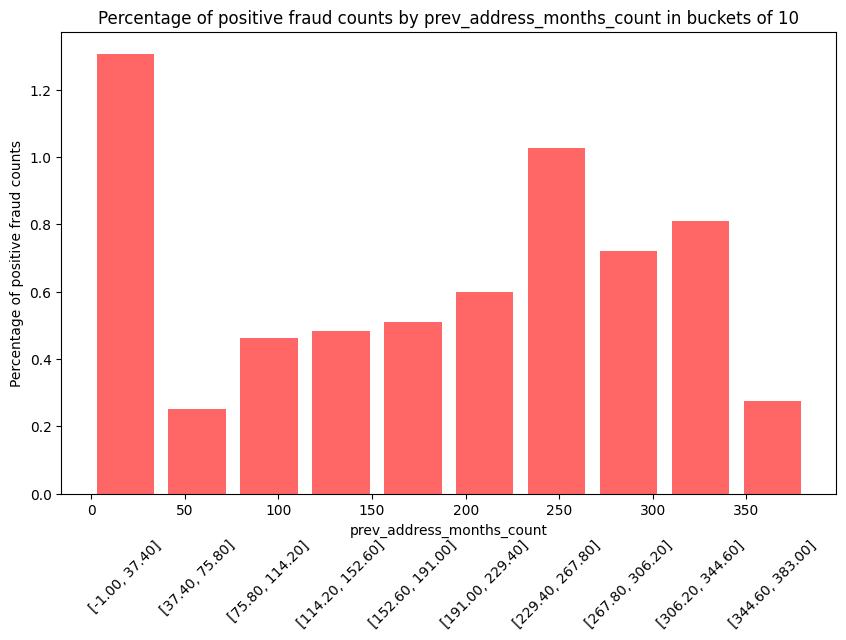

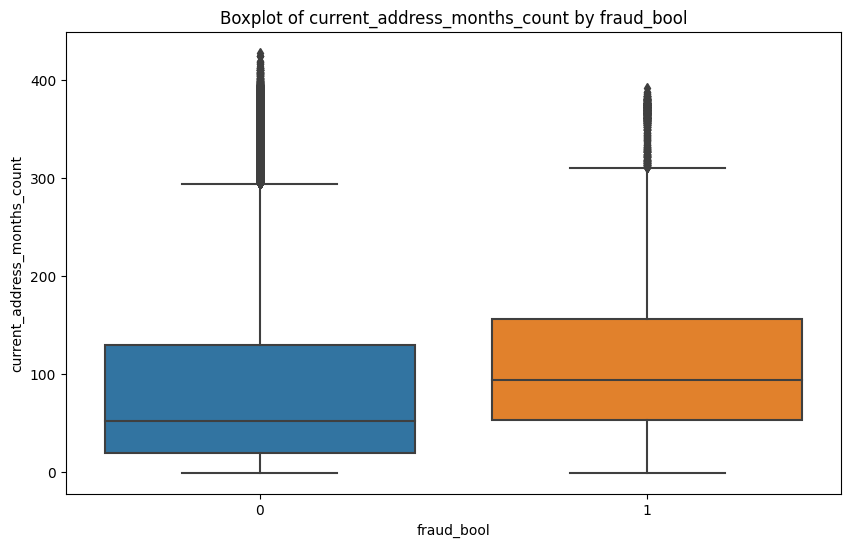

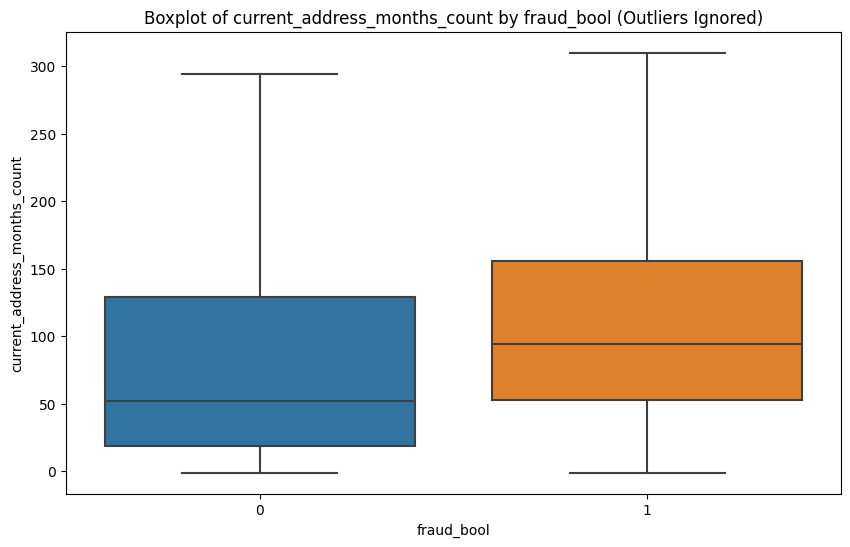

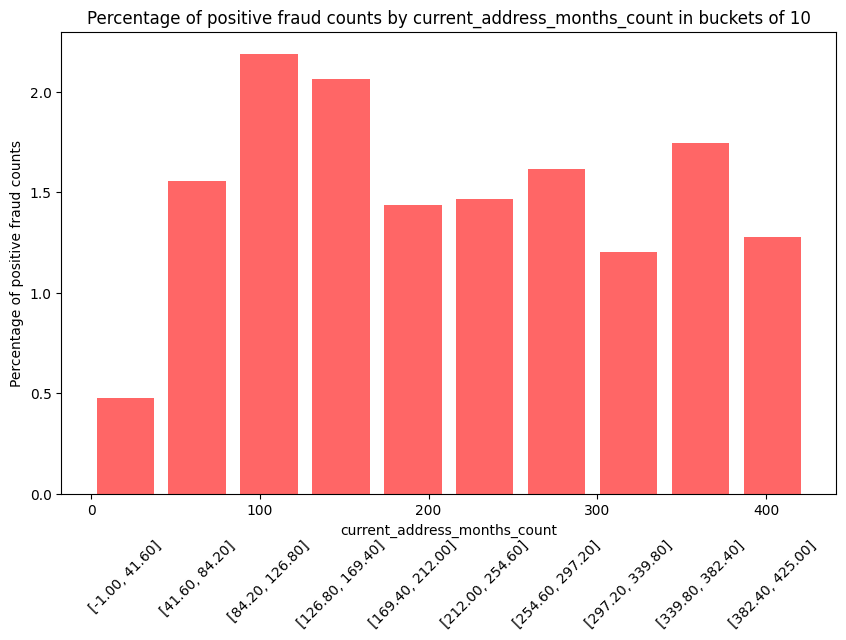

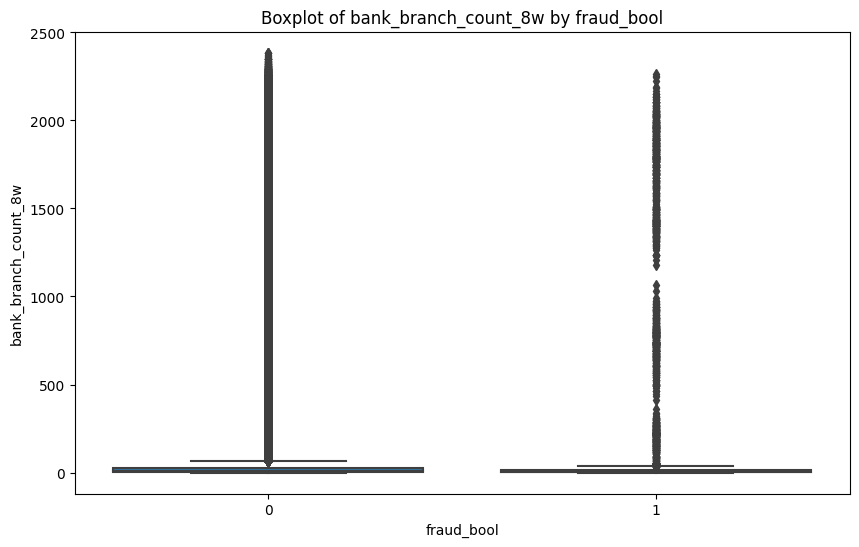

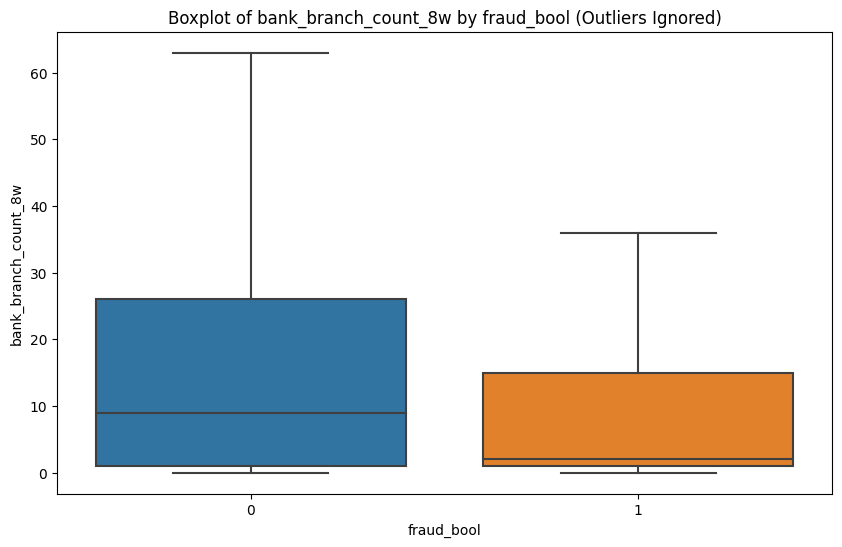

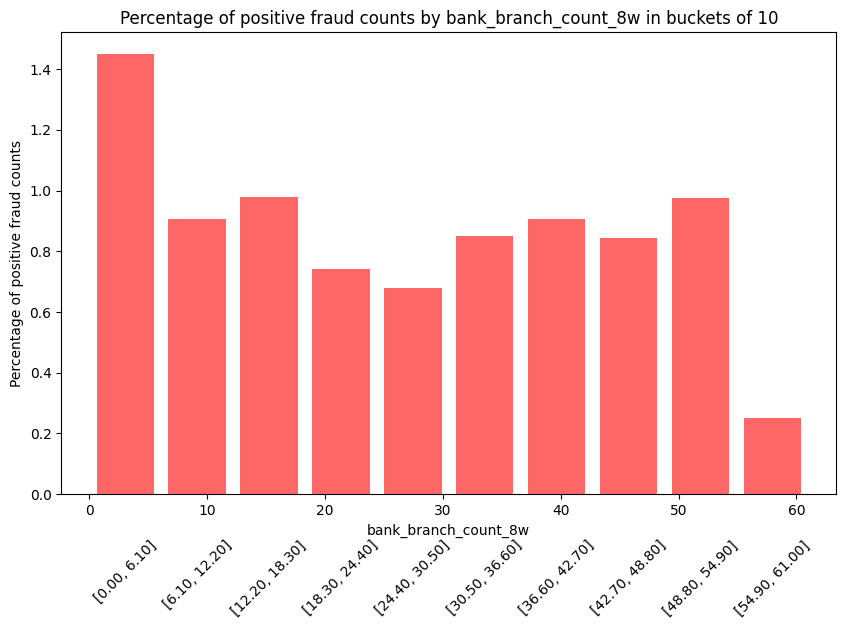

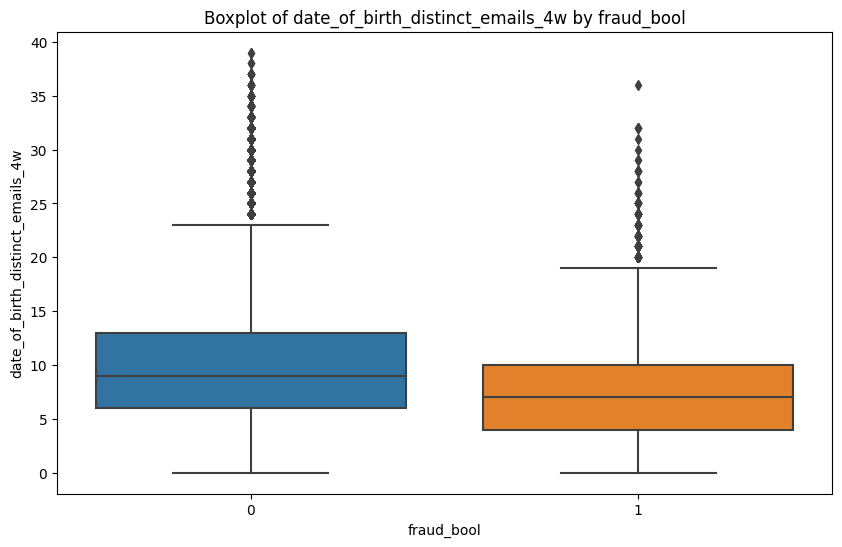

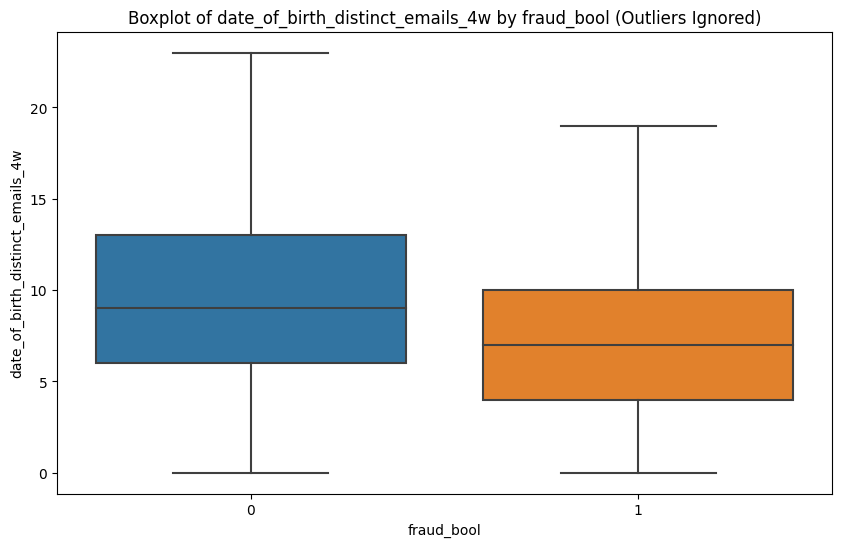

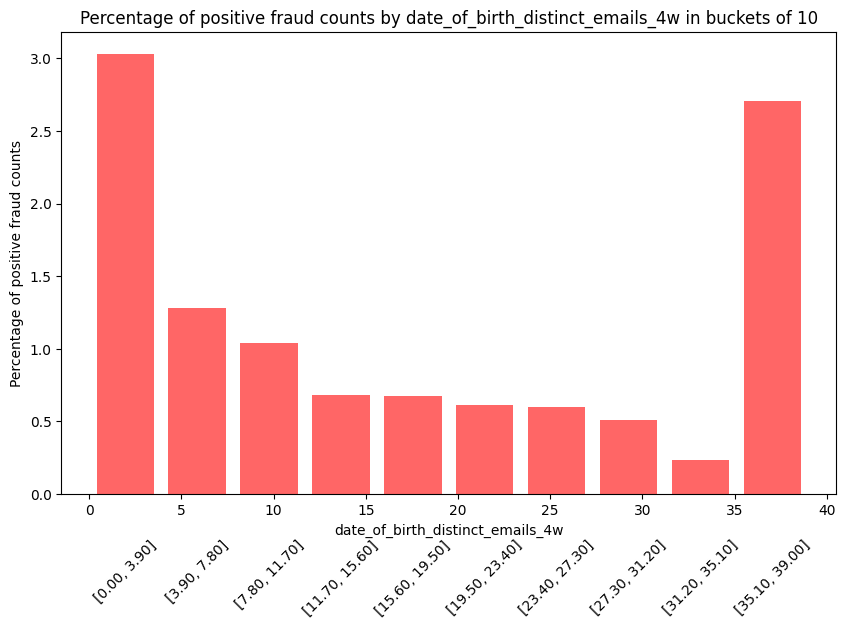

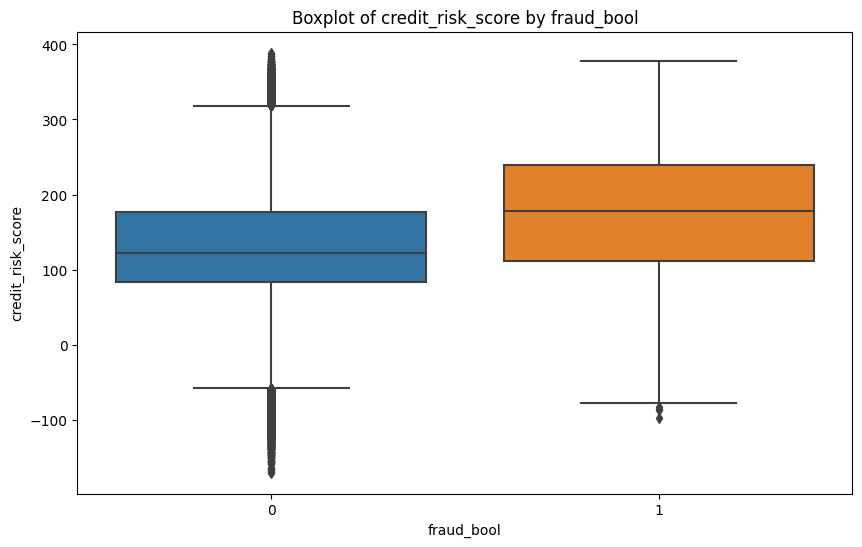

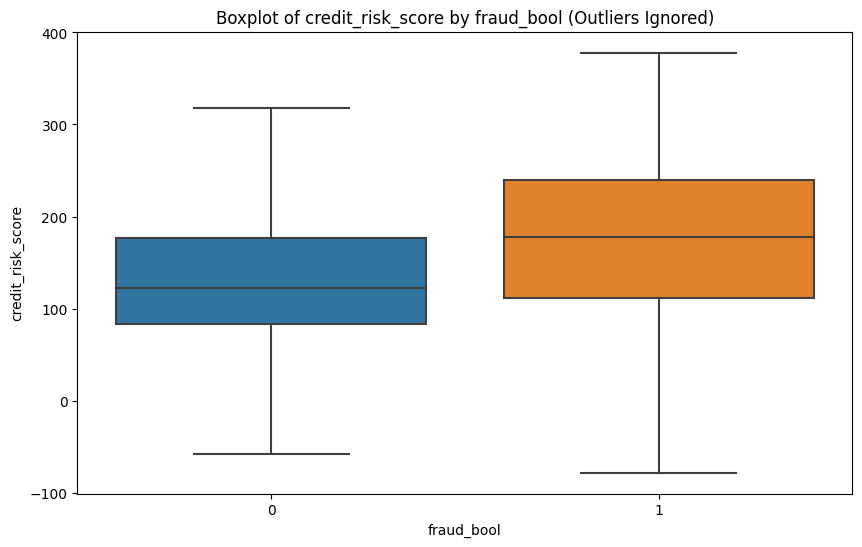

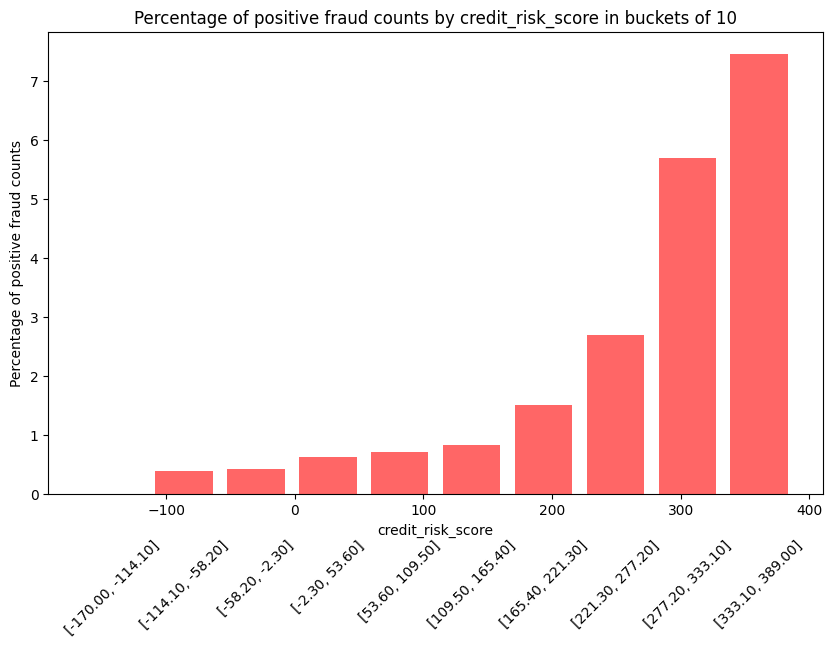

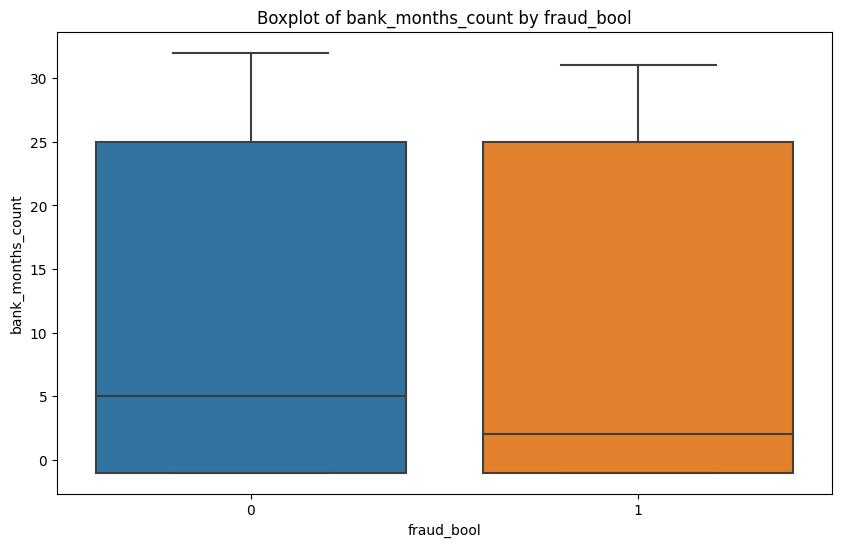

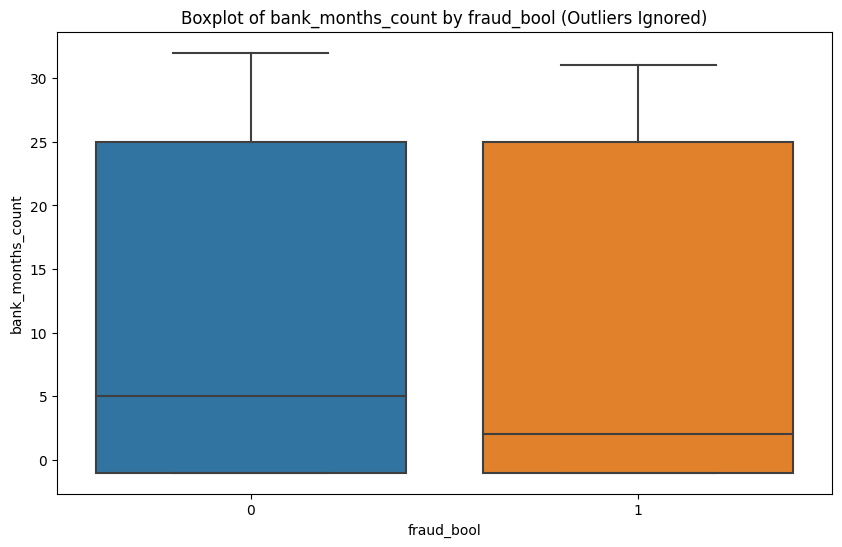

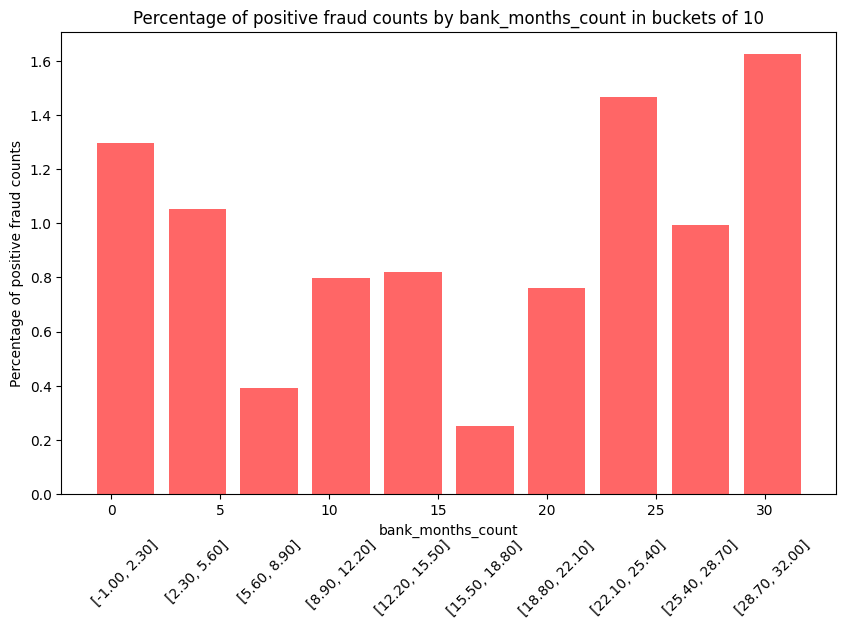

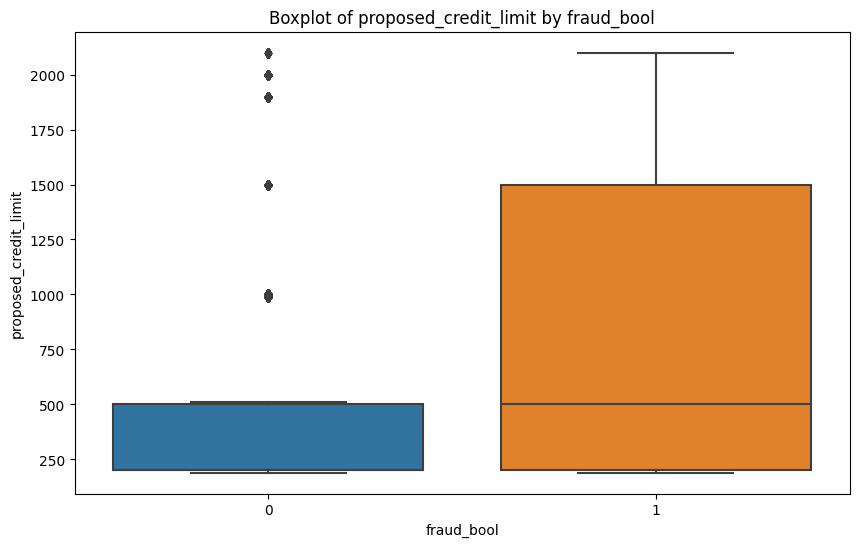

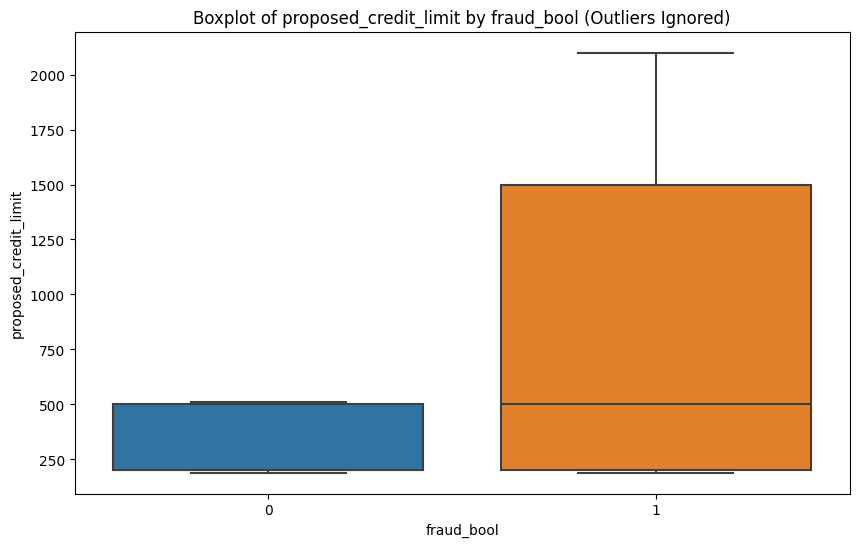

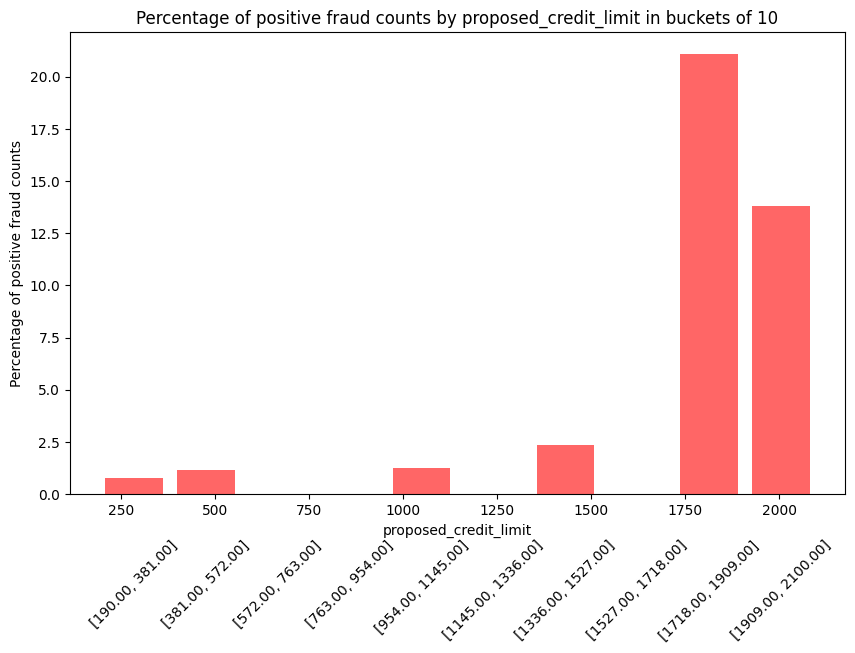

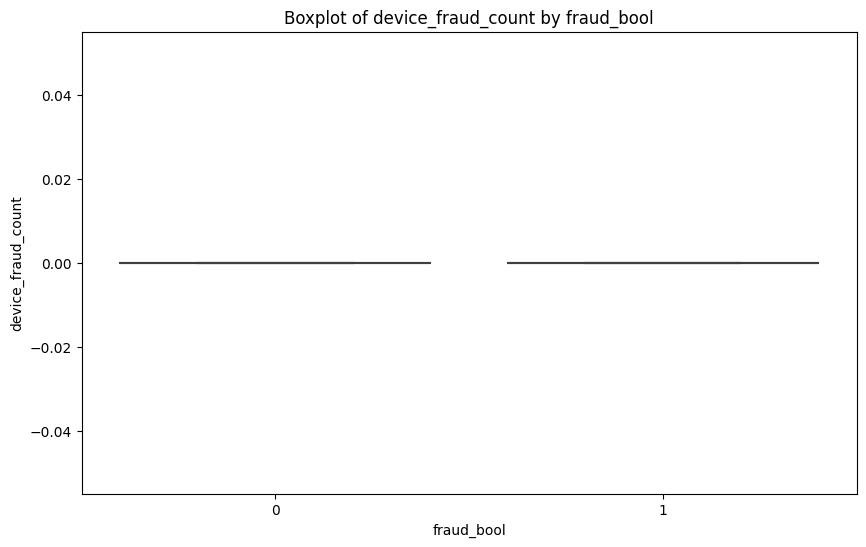

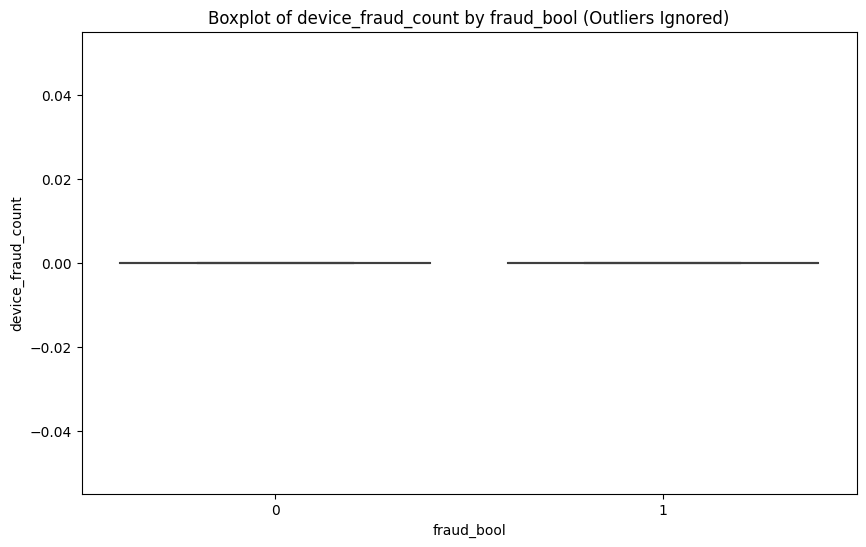

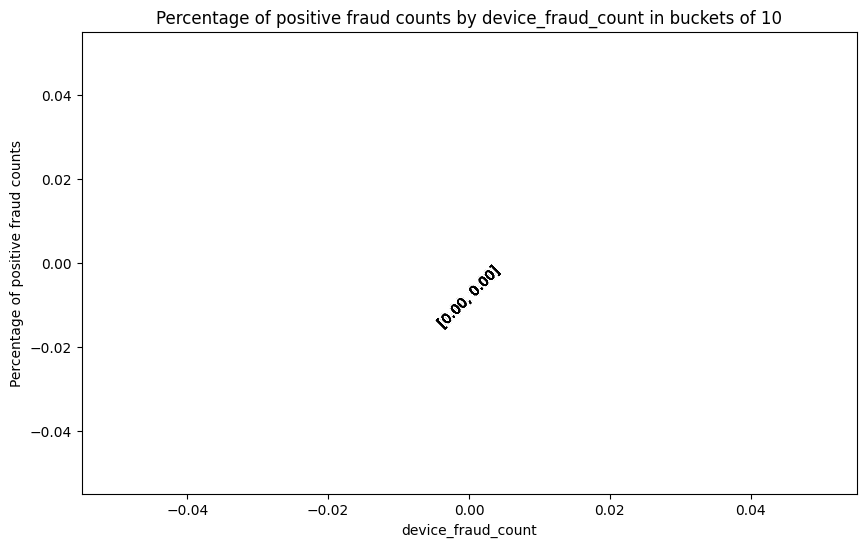

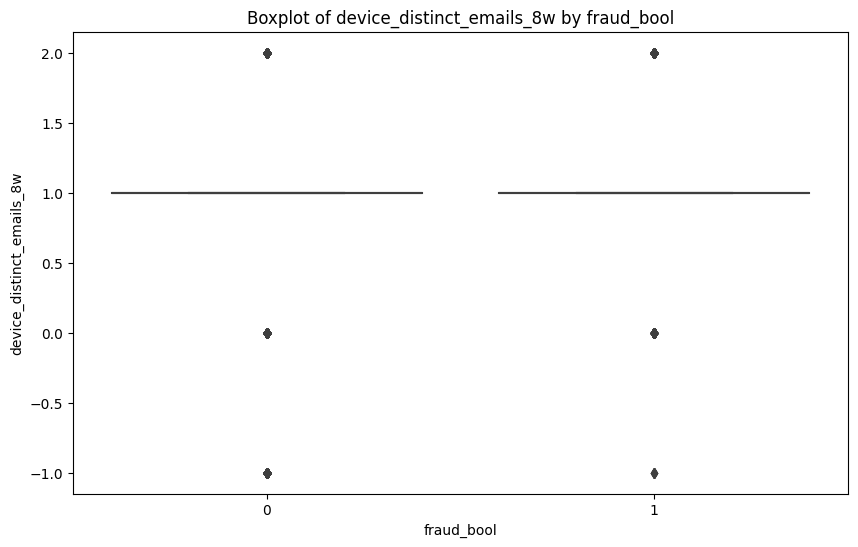

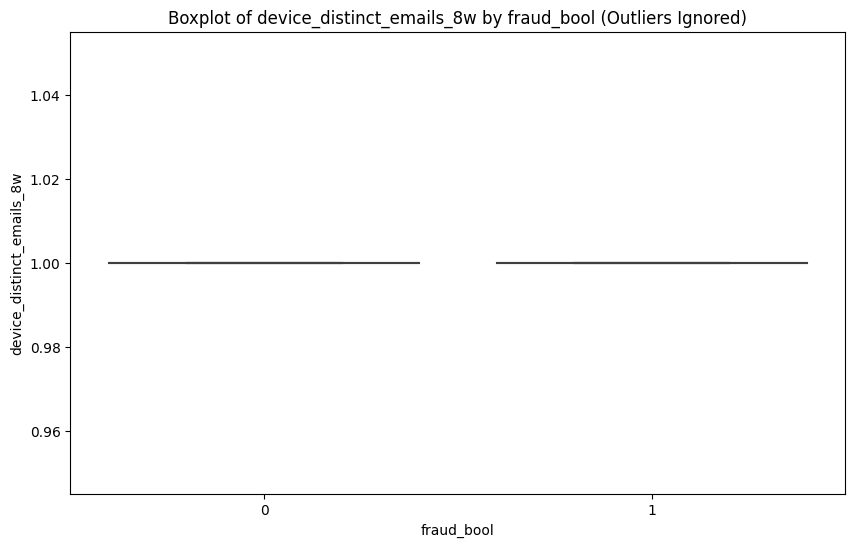

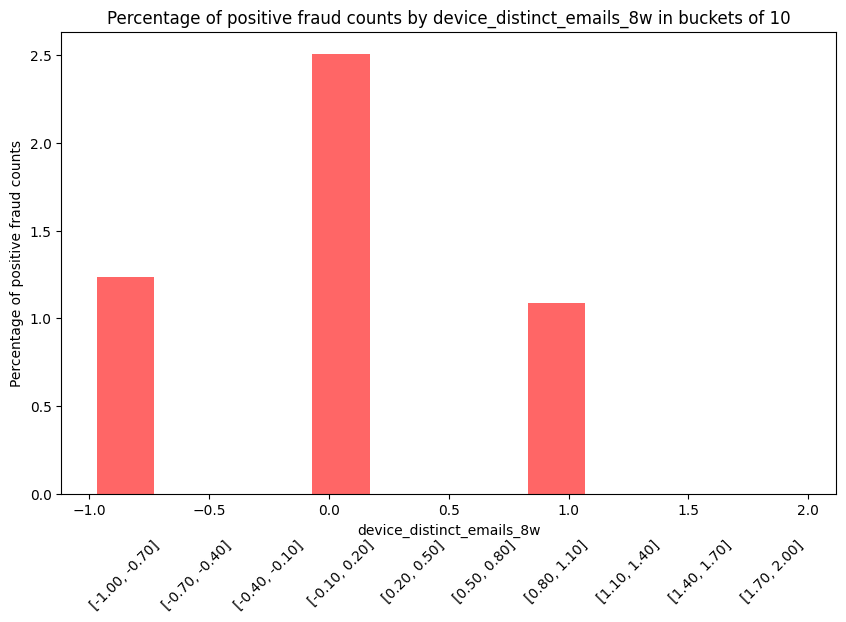

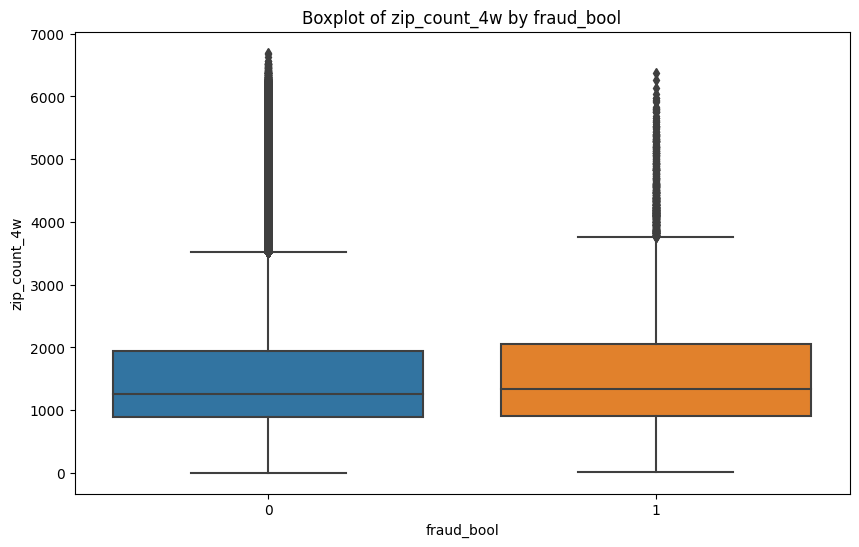

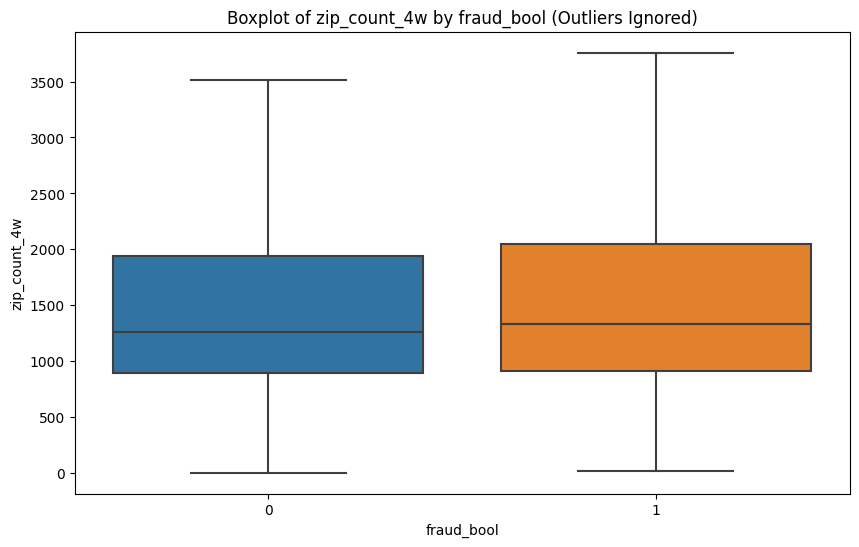

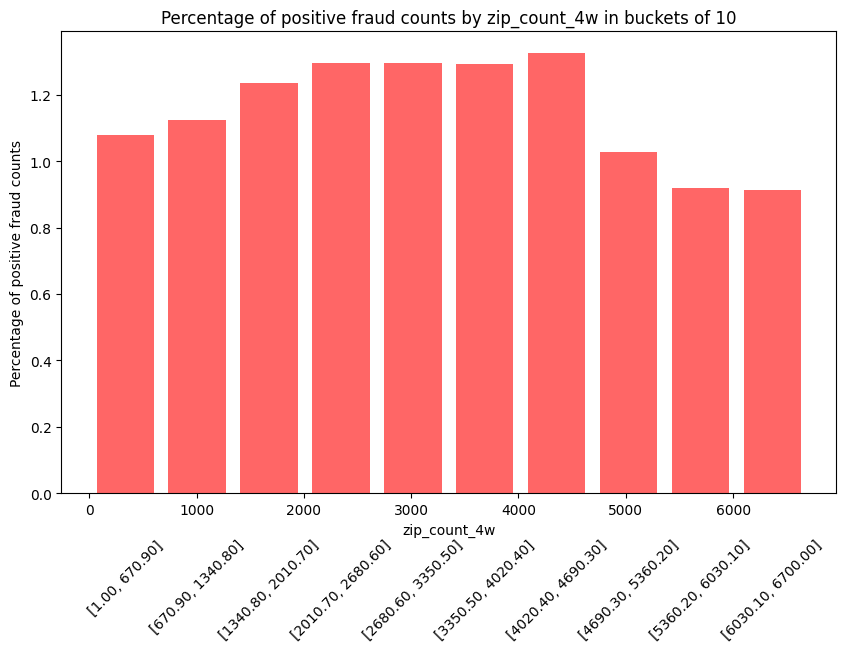

In [85]:
fv.numerical_discrete(data_types['numerical_discrete'])